8000


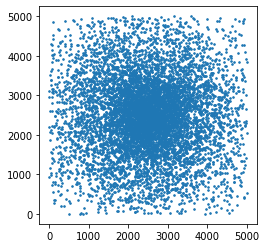

In [1]:
# Generating Houses data

import numpy as np
import matplotlib.pyplot as plt

n_houses = 8000
np.random.seed(17)

i = 0
samples_x = []
samples_y = []

n_sample_1 = n_houses * 0.25
while i < n_sample_1:
    x = np.random.normal(loc=0, scale=500)
    y = np.random.normal(loc=0, scale=500)
    if abs(x) < 1000 and abs(y) < 1000:
        samples_x.append(x)
        samples_y.append(y)
        i+=1
i=0
n_sample_2 = n_houses * 0.75
while i < n_sample_2:
    x = np.random.normal(loc=0, scale=1250)
    y = np.random.normal(loc=0, scale=1250)
    if abs(x) < 2500 and abs(y) < 2500:
        samples_x.append(x)
        samples_y.append(y)
        i+=1        

print(len(samples_x))
for i in range(0, 8000):
    samples_x[i] += 2500
    samples_y[i] += 2500
        
        
        
plt.scatter(samples_x, samples_y, marker=".",s=10)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw() 